In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import datetime

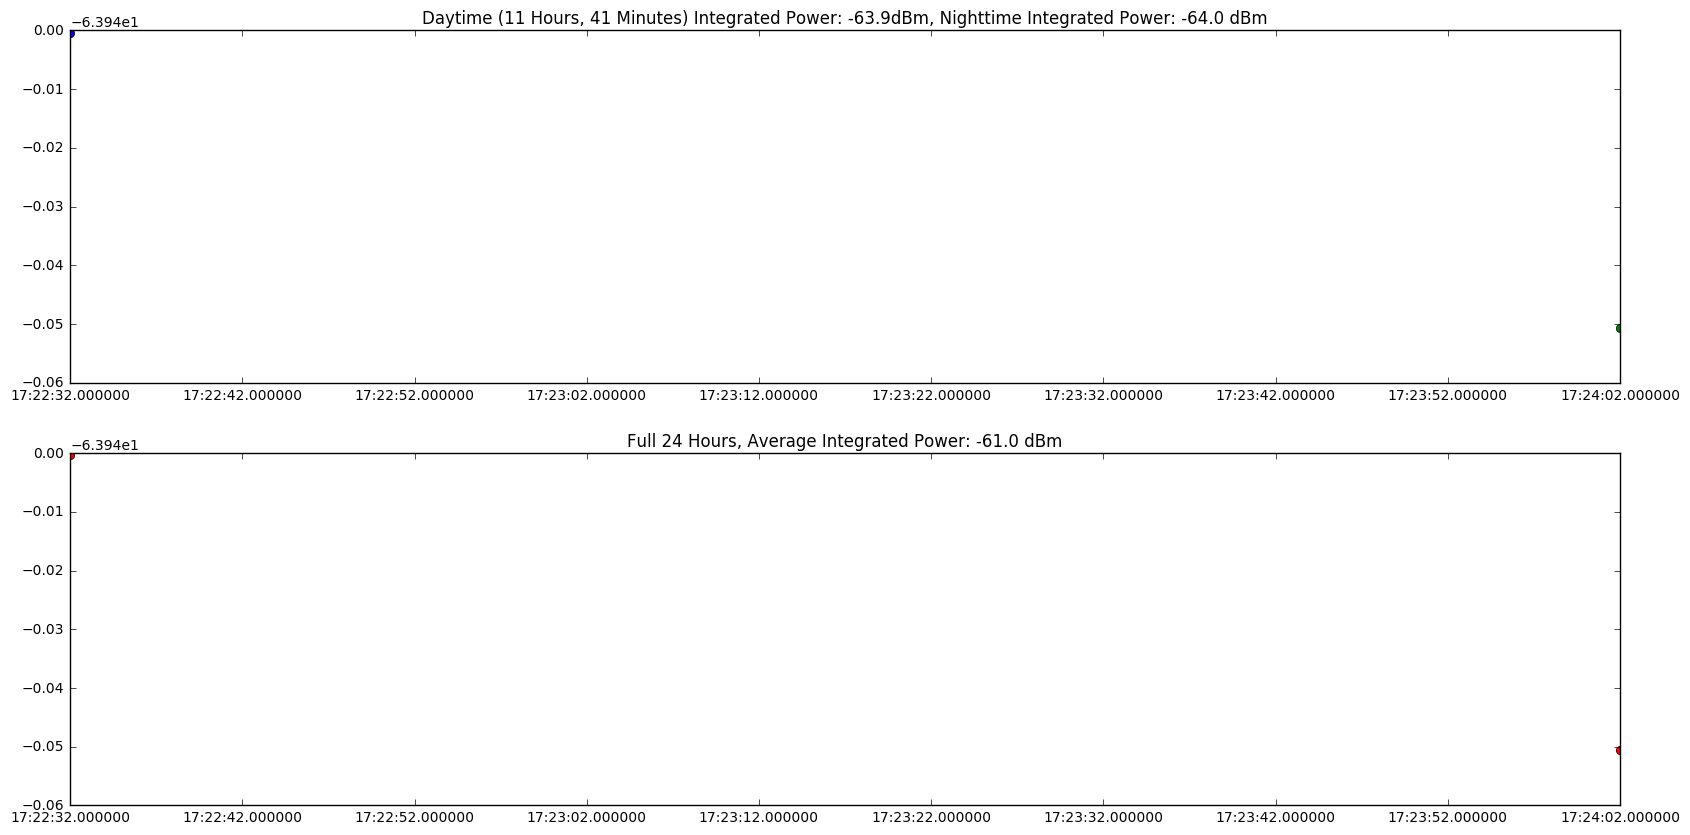

In [2]:
# get data location
data_path = os.getcwd() #Temporary, while I work on local computer. For actual github instantion, use: data_path = os.environ['DATA_PATH']
OUT_DAY = 'arr_day.npy' #the output files containing integrated power and metadata for each sweep-spectrum on record
OUT_NIGHT = 'arr_night.npy'

#***
def delta_hours_minutes(td):
    return td.seconds//3600, (td.seconds//60)%60
def time_in_rids_fmt(datetime_time): # convert datetime.datetime.now() time into the RIDZ-requested format
	str_iso = datetime_time.isoformat(' ')
	str_time_rids = str( str_iso[0:4] + str_iso[5:7] + str_iso[8:10] + '-' + str_iso[11:13]+str_iso[14:16]+str_iso[17:19])
	return str_time_rids

def sum_array_of_dbm(arr):
	val_sum = 10.*np.log10(np.sum(np.power(10,np.array(arr)/10.)))
	return val_sum
STR_DAY = '20180908'
SUNSET_TIMETABLE = np.genfromtxt('HERA_sunrise_sunset_annual.csv', dtype=str,delimiter=',') 
col_date,col_key = np.where(SUNSET_TIMETABLE == STR_DAY[4:]) #find mmdd, but it could also be a time
sunrise = datetime.datetime.strptime( str(str(STR_DAY[:4])+str(STR_DAY[4:])+'-'+str(SUNSET_TIMETABLE[int(col_date[col_key==0])][1])) ,'%Y%m%d-%H%M')
sunset = datetime.datetime.strptime( str(str(STR_DAY[:4])+str(STR_DAY[4:])+'-'+str(SUNSET_TIMETABLE[int(col_date[col_key==0])][2])) ,'%Y%m%d-%H%M')
delta_hour, delta_minute = delta_hours_minutes((sunset-sunrise))
#****


arr_day=np.load(OUT_DAY) # content: [datetime.datetime obj], [float(integrated power)]
arr_night=np.load(OUT_NIGHT)

arr_full_day = np.concatenate((np.array(arr_day), np.array(arr_night)),axis=0)

plt.figure(1, figsize=(20,10))
plt.subplot(211)
plt.plot(arr_day[:,0], arr_day[:,1],'bo')
plt.plot(arr_night[:,0], arr_night[:,1],'go')
plt.subplot(211).set_title(str('Daytime ('+str(delta_hour)+' Hours, '+str(delta_minute)+' Minutes) Integrated Power: '+str(  np.round(sum_array_of_dbm(arr_day[:,1]),decimals=1) )+ 'dBm, Nighttime Integrated Power: '+str(  np.round(sum_array_of_dbm(arr_night[:,1]),decimals=1)  )+' dBm'))
plt.subplot(212)
plt.plot(arr_full_day[:,0], arr_full_day[:,1],'ro')
plt.subplot(212).set_title(str('Full 24 Hours, Average Integrated Power: ' + str(  np.round(sum_array_of_dbm(arr_full_day[:,1]),decimals=1)  )+' dBm'))

 
plt.show()